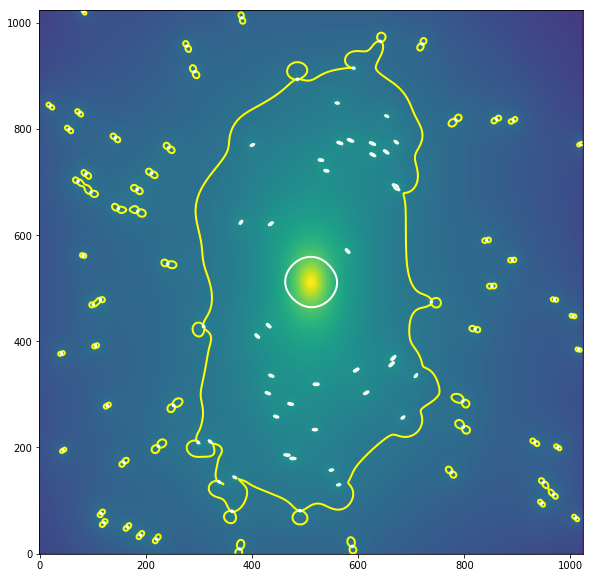

In [3]:
import sys
sys.path.insert(0, '/Users/massimo/Sites/PersonalPage/startbootstrap-grayscale-1.0.6/teaching/ScuolaMilano/')
from mynewdeflector import *
from matplotlib.colors import LogNorm, PowerNorm, SymLogNorm
%matplotlib inline
"""
Main lens:
"""
kwargs={'theta_c': 5.0, 'norm': 30.0, 'ell': 0.2}
size=200.0
npix=1024.0
main_lens=psie(size=size,npix=npix,**kwargs)

"""
substructures
"""
n_pert=100

xsub=(np.random.random_sample(n_pert)-0.5)*size
ysub=(np.random.random_sample(n_pert)-0.5)*size

fsub=np.random.random_sample(n_pert)
pa=np.random.random_sample(n_pert)*2.0*np.pi

pot=main_lens.pot
for i in range(n_pert):
    kwargs={'theta_c': 0.0, 'norm': 0.5, 'ell': 0.0, 'pa': pa[i]}
    sub_lens=psie(x0=xsub[i],y0=ysub[i],size=size,npix=npix,**kwargs)
    pot=pot+sub_lens.pot

df=deflector_from_potential(pot=pot,size=size,npix=npix)

fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.imshow(df.convergence(),origin='low',norm=LogNorm())
g1,g2=df.shear()
lambdat=1.0-df.convergence()-np.sqrt(g1*g1+g2*g2)
lambdar=1.0-df.convergence()+np.sqrt(g1*g1+g2*g2)
cst=ax.contour(lambdat,levels=[0.0],colors='yellow',linewidths=2)
ax.imshow(lambdar,origin='low',alpha=0)
csr=ax.contour(lambdar,levels=[0.0],colors='white',linewidths=2)

(3723, 3595, 4)
-6142.5 10237.5
-1256.7769520628624 5184.866502298609
(4096, 4096)


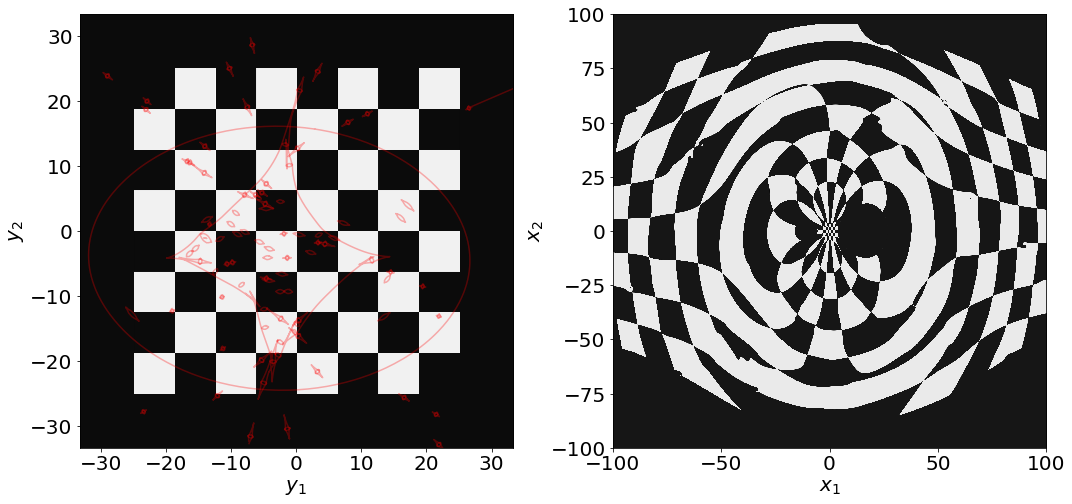

In [5]:
import matplotlib.image as mpimg
from skimage.transform import resize, rotate
imgsize=50.0
#img=mpimg.imread('/Users/massimo/CODES/PYTHON/matplotlib/doc/_static/stinkbug.png')
img=mpimg.imread('xigL78AyT.png')
print (img.shape)

npix=4096
nres=4096
#image1=resize(img[:,:,1], (224,224), mode='reflect')

image1=resize(img[:,:,0], (nres,nres),mode='reflect')
#image1=resize(img[::-1,:,0], (2000,2000),mode='reflect')
image1=rotate(image1,180.0)
kwargs={'pa': 0.0, 'ys1': 0.0, 'ys2': 0.0, 'flux': 1.0}
ps=postage_stamp(image1,imgsize,200.0,npix,**kwargs)
ps_lensed=postage_stamp(image1,imgsize,200.0,npix,gl=df,**kwargs)



fig,ax=plt.subplots(1,2,figsize=(15,8))
df.caustics(ax=ax[0],alpha=0.3)
ax[0].imshow(ps.image,extent=[-ps.size/2,ps.size/2,-ps.size/2,ps.size/2],
             cmap='gray',zorder=1,origin='lower')
ax[1].imshow(ps_lensed.image,extent=[-ps_lensed.size/2,ps_lensed.size/2,-ps_lensed.size/2,ps_lensed.size/2],
             origin='lower',cmap='gray')
print (np.array(image1).shape)

ax[0].set_xlim([-size/6.,size/6.])
ax[0].set_ylim([-size/6.,size/6.])
ax[1].set_xlim([-size/2.,size/2.])
ax[1].set_ylim([-size/2.,size/2.])
                      
ax[1].set_xlabel('$x_1$',fontsize=20)
ax[1].set_ylabel('$x_2$',fontsize=20)
ax[0].set_xlabel('$y_1$',fontsize=20)
ax[0].set_ylabel('$y_2$',fontsize=20)
for i in range(2):
    ax[i].xaxis.set_tick_params(labelsize=20)
    ax[i].yaxis.set_tick_params(labelsize=20)
    ax[i].set_aspect('equal')
    
plt.tight_layout()

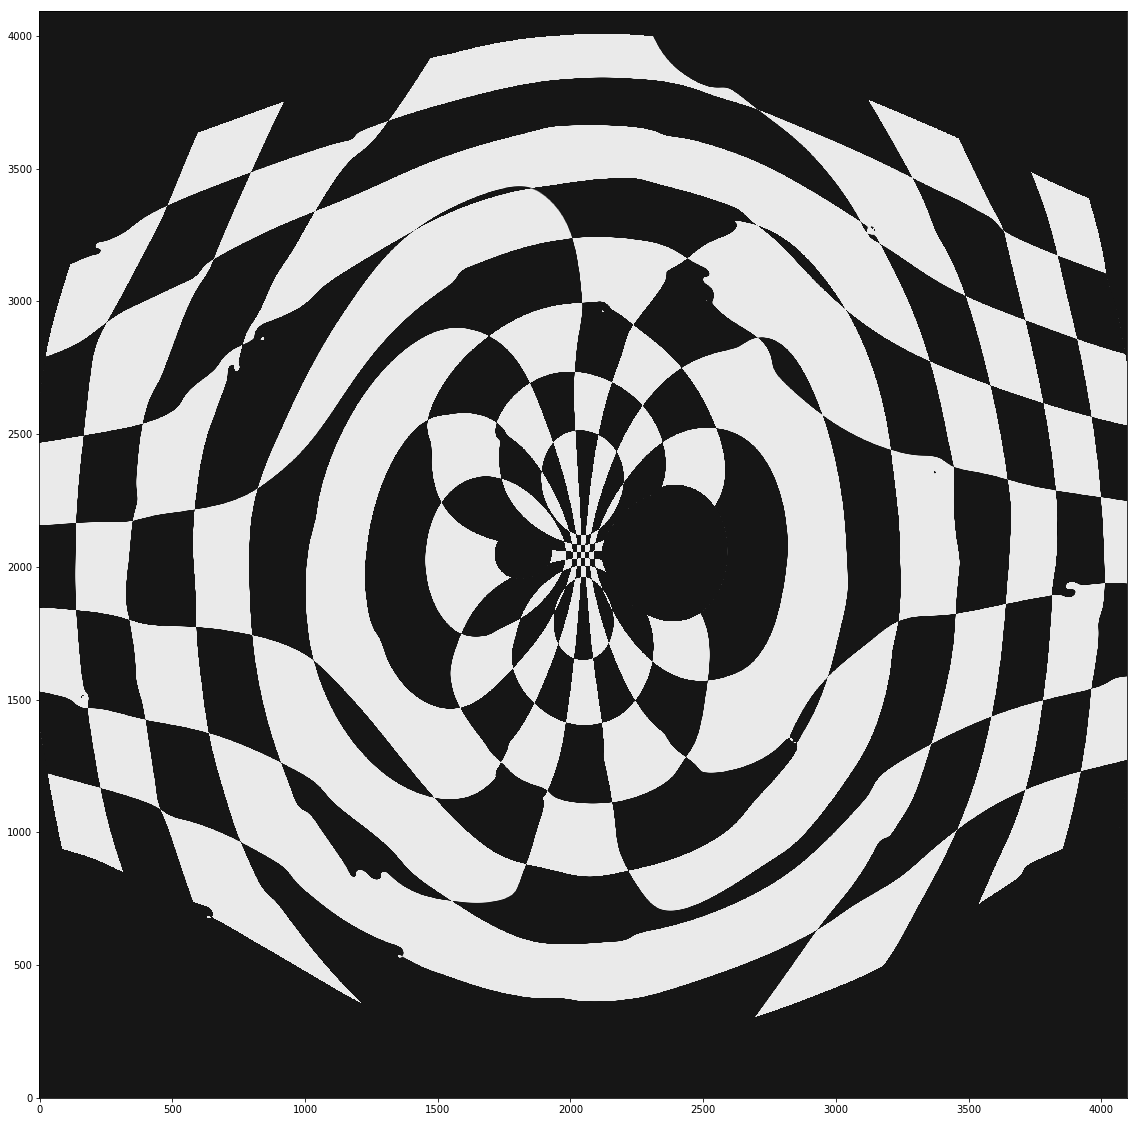

In [6]:
fig,ax=plt.subplots(1,1,figsize=(20,20))
ax.imshow(ps_lensed.image,origin='lower',cmap='gray')